## Load Data and dependencies

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [3]:
# load the datasets
train = pd.read_csv(r"C:\Users\Morinyo Baddestman\Documents\playground-series-s4e10\train.csv", index_col=0)

In [4]:
train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
id,,,,,,,,,,,,
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [5]:
# check shape
print('train dataset shape:', train.shape)

train dataset shape: (58645, 12)


In [5]:
# print the dataset features
train.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

## Data cleaning 
    - drop the duplicates of the datesets first
    - check for data types and correct any errors in their representation
    - check null values and impute them using mean/ median strategy where appropriate
    - check for outliers in the dataset 
        develop boxplots for numerical features to identify feature with extreme outliers
        clamp on the outliers

In [6]:
# check for nan and null values in the dataset 
train.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [7]:
# check for data types and confirm if null values exist
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  58645 non-null  int64  
 1   person_income               58645 non-null  int64  
 2   person_home_ownership       58645 non-null  object 
 3   person_emp_length           58645 non-null  float64
 4   loan_intent                 58645 non-null  object 
 5   loan_grade                  58645 non-null  object 
 6   loan_amnt                   58645 non-null  int64  
 7   loan_int_rate               58645 non-null  float64
 8   loan_percent_income         58645 non-null  float64
 9   cb_person_default_on_file   58645 non-null  object 
 10  cb_person_cred_hist_length  58645 non-null  int64  
 11  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.8+ MB


### Visualize outliers using boxplots
    - identify outliers if any in the boxplots
    - create a function to remove outliers in the dataset using IQR method

In [21]:
# select the numerical columns in the dataset
numerical_columns = [col for col in train.select_dtypes(exclude='object') if col != 'loan_status' ]
print(numerical_columns)
len(numerical_columns)

['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']


7

Visualize boxplots of the numerical columns to visually identify outliers

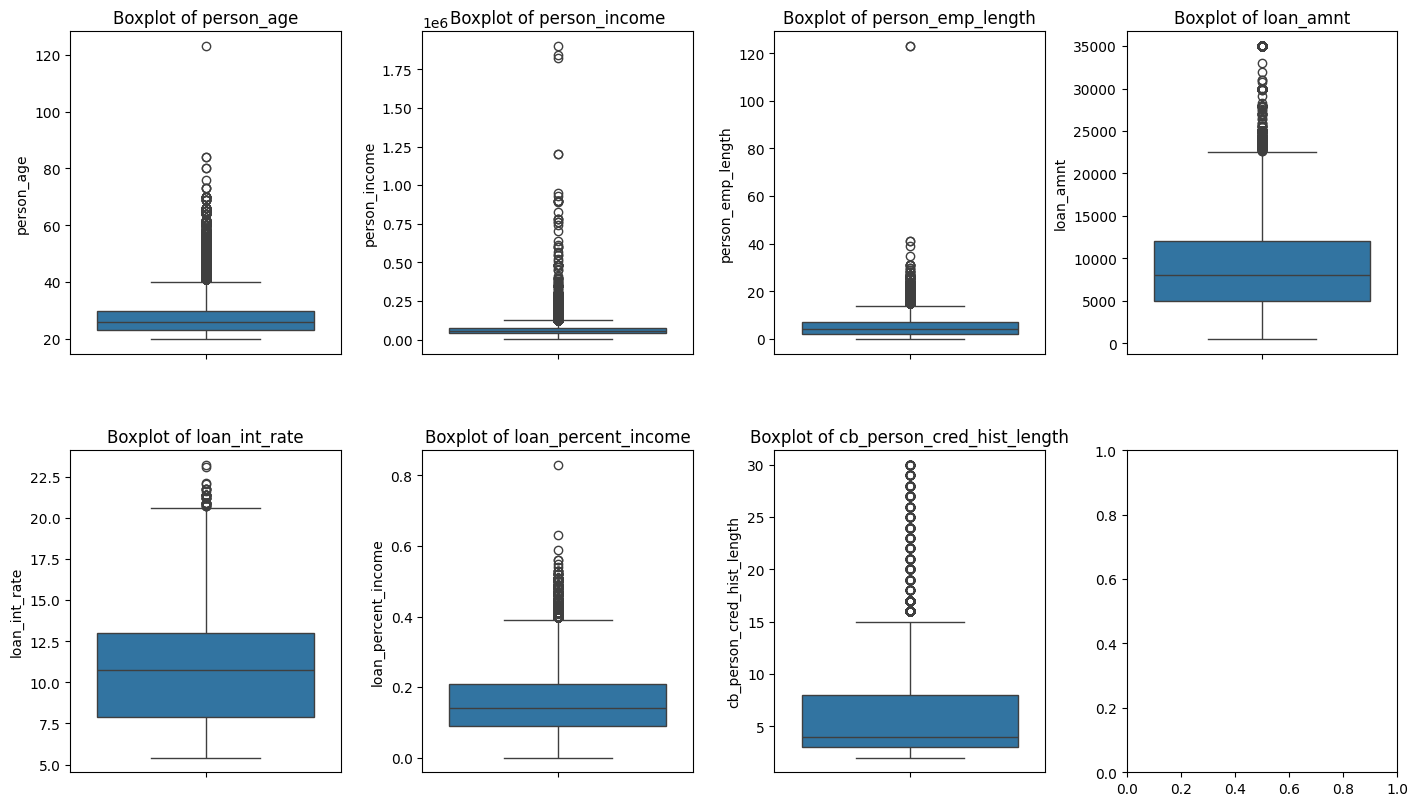

In [22]:
# create a function to loop through each numerical column and plot the boxplot for the distribution of the column

def plot_boxplots(data, numerical_columns):
    # set up subplots
    fig, axs = plt.subplots(2, 4, figsize=(14, 8))
    axs = axs.flatten()  # flatten 2D array to 1D for easy indexing
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    for index, col in enumerate(numerical_columns):
        if index < len(axs):  
            sns.boxplot(y=data[col], ax=axs[index])
            axs[index].set_title(f'Boxplot of {col}')
        else:
            break  
    plt.show()

# Example usage:
plot_boxplots(train, numerical_columns)


The dataset has substantial outliers:

    - the person_age column has an individual with over 120 years who has applied for a loan which is unrealistic. 
    
    -- its important to note that this outlier records also contain important information, investigate the effects
    of eliminating them and decide either remove or retain them 

In [24]:
# remove outliers function 

def remove_outliers_iqr(df, numerical_columns):

    # create a copy of the dataset 
    train_clean = train.copy()
    
    for col in numerical_columns:
        q1 = train_clean[col].quantile(0.25)
        q3 = train_clean[col].quantile(0.75)
        iqr = q3-q1
        lower_bound = q1 - 1.5*iqr
        upper_bound = q3 + 1.5*iqr

        # return a filtered dataset removing the outliers
    return train_clean[(train_clean[col] >= lower_bound) & (train_clean[col] <= upper_bound)]

    
train_clean = remove_outliers_iqr(train, numerical_columns)

In [27]:
def remove_outliers_iqr(df, numerical_columns):
    # create a copy of the dataset 
    train_clean = df.copy()
    
    for col in numerical_columns:
        q1 = train_clean[col].quantile(0.25)
        q3 = train_clean[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Filter the DataFrame to remove outliers in the current column
        train_clean = train_clean[(train_clean[col] >= lower_bound) & (train_clean[col] <= upper_bound)]
    
    return train_clean

# Usage
train_clean = remove_outliers_iqr(train, numerical_columns)


In [28]:
print('train_shape:', train.shape)
print('train without outliers shape:', train_clean.shape)

train_shape: (58645, 12)
train without outliers shape: (48727, 12)


visualize the boxplots of the cleaned dataset to visually identify the impact of removing outliers

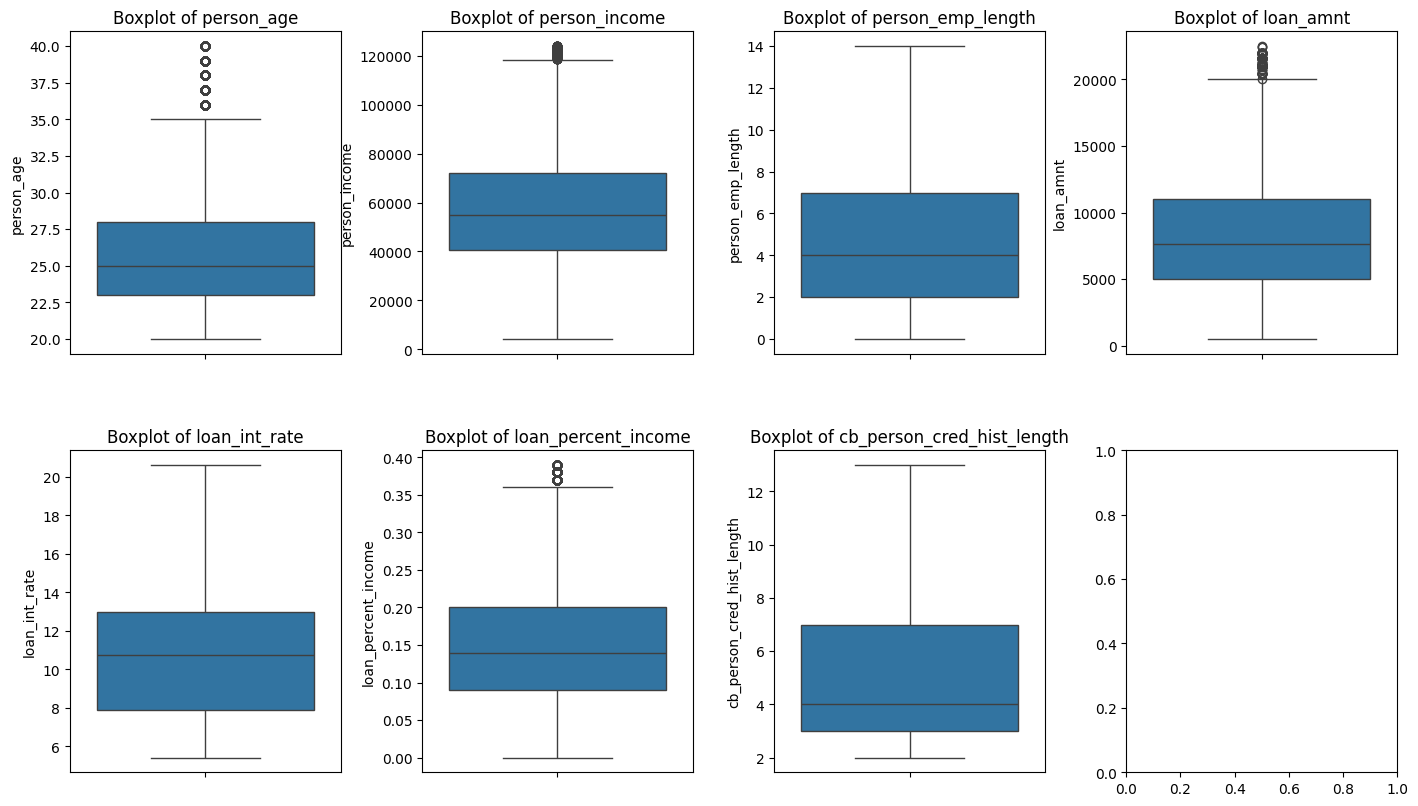

In [29]:
# Create a boxplots of the train with the outliers removed using the fuction created before
plot_boxplots(train_clean, numerical_columns)

removing outliers seems to remove important records across the dataset features 

    -- retain the outliers and investigate their effect later

## Exploratory Analysis
    - summary statistics of the dataset
    - value counts distribution for object features
    - distribution of numerical features

In [39]:
# summary statistics 
round(train.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
person_age,58645.0,27.55,6.03,20.00,23.00,26.00,30.00,123.00
person_income,58645.0,64046.17,37931.11,4200.00,42000.00,58000.00,75600.00,1900000.00
person_emp_length,58645.0,4.70,3.96,0.00,2.00,4.00,7.00,123.00
loan_amnt,58645.0,9217.56,5563.81,500.00,5000.00,8000.00,12000.00,35000.00
loan_int_rate,58645.0,10.68,3.03,5.42,7.88,10.75,12.99,23.22
loan_percent_income,58645.0,0.16,0.09,0.00,0.09,0.14,0.21,0.83
cb_person_cred_hist_length,58645.0,5.81,4.03,2.00,3.00,4.00,8.00,30.00
loan_status,58645.0,0.14,0.35,0.00,0.00,0.00,0.00,1.00


In [40]:
round(train_clean.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
person_age,56199.0,26.73,4.49,20.00,23.00,26.00,29.00,40.00
person_income,56199.0,63798.81,37804.66,4200.00,42000.00,57996.00,75000.00,1900000.00
person_emp_length,56199.0,4.66,3.84,0.00,2.00,4.00,7.00,123.00
loan_amnt,56199.0,9200.20,5548.55,500.00,5000.00,8000.00,12000.00,35000.00
loan_int_rate,56199.0,10.67,3.03,5.42,7.88,10.75,12.99,23.22
loan_percent_income,56199.0,0.16,0.09,0.00,0.09,0.14,0.21,0.83
cb_person_cred_hist_length,56199.0,5.38,3.38,2.00,3.00,4.00,8.00,29.00
loan_status,56199.0,0.14,0.35,0.00,0.00,0.00,0.00,1.00


# Feature Engineering

## Model training 

1. RandomForestRegressor
    - check for correlation
    - 

2. RandomForestClassifier